# Quant basics

Bem vindo ao projetinho do Turing Quant!

Neste notebook você aprenderá os seguinte assuntos:

- Importação e visualização de dados financeiros
- Retornos e Risco de um ativo
- Análise de portfólios
- Previsão de Series Temporais

## 1. Importação de dataset de preço histórico

Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Investing.com (investpy)

Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

- 1.1) Plote os preços de fechamento
- 1.2) Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)

In [1]:
%pip install yfinance --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings

In [3]:
warnings.simplefilter('ignore')

In [4]:
df = pd.DataFrame(yf.download('WEGE3.SA'))

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,30.549999,30.559999,29.330000,29.920000,29.920000,9054700
2022-01-25,29.870001,30.340000,29.620001,29.980000,29.980000,5327000
2022-01-26,30.450001,31.340000,30.260000,30.740000,30.740000,12183300
2022-01-27,30.990000,32.500000,30.750000,32.400002,32.400002,10350400
2022-01-28,32.330002,32.330002,30.959999,31.620001,31.620001,9012800


In [6]:
df_fechamento = df[['Adj Close']]

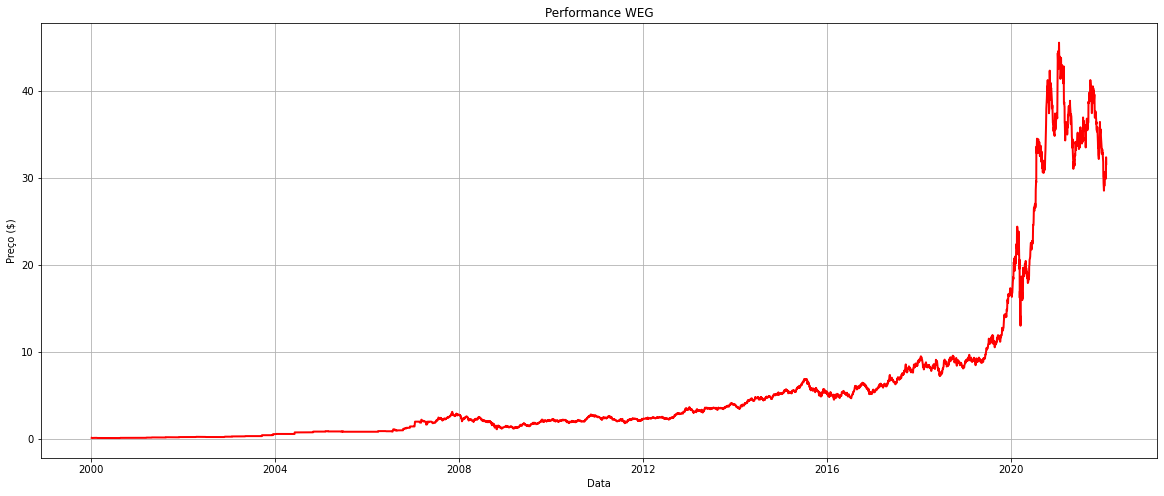

In [7]:
plt.figure(figsize=(20, 8))
plt.plot(df_fechamento, color='red', linewidth=2)
plt.title('Performance WEG')
plt.ylabel('Preço ($)')
plt.xlabel('Data')
plt.grid()
plt.show()

## Análise qualitativa

A Weg é uma empresa que ja está há muito tempo na bolsa, desde 1971, e por ser uma empresa atuante no setor industrial com a fabricação de equipamentos elétricos, cresceu muito nos últimos 20 anos. Nesse período também realizou muitas fusões e aquisições. Acredito que teve uma oscilação grande de 2020 em diante por conta da pandemia, e atualmente está com os preços em queda, apesar de ser um setor sólido do país.

# 2. Retorno e Risco

Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.

## Retorno

Existem algumas maneiras de se calcular o retorno de uma série temporal, aqui podemos citar duas:

- 2.1) Retorno Percentual: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$
- 2.2) Retorno Logaritmo: $r_t = \ln(\frac{P_t}{P{t-1}}) = \ln(P_t) - \ln(P_{t-1})$

Sendo $P_t$ o preço no tempo t, e $P_{t-1}$ preço no tempo $t-1$ (Dia anterior).

Manipulando o dataframe implemente esse dois tipos de retonos e compare-os. 

Calcule os retornos cumulativos ao longo do tempo:

- 2.3) Retorno Cumulativo Percentual: 

$R_{cum} = \prod_{t=0}^{t = \text{max dias}}{(1 + R_{t})} =  (1+R_{t-\text{max dias}}) * \dots * (1+R_{t-1}) * (1+R_t)$
- 2.4) Retorno Cumulativo Logaritmo: 

$r_{cum} = \sum_{t = 0}^{t = \text{max dias}}{(1 + r_t)} = (1+r_{t-\text{max dias}}) + \dots + (1+r_{t-1}) + (1+r_t)$

In [8]:
df_fechamento['simple_return'] = (df_fechamento['Adj Close'] / df_fechamento['Adj Close'].shift(1)) - 1

In [9]:
df_fechamento

,Adj Close,simple_return
Date,,
2000-01-03,0.126049,NaN
2000-01-04,0.121626,-0.035093
2000-01-05,0.121626,0.000000
2000-01-06,0.110569,-0.090910
2000-01-07,0.110569,0.000000
...,...,...
2022-01-24,29.920000,-0.022542
2022-01-25,29.980000,0.002005
2022-01-26,30.740000,0.025350


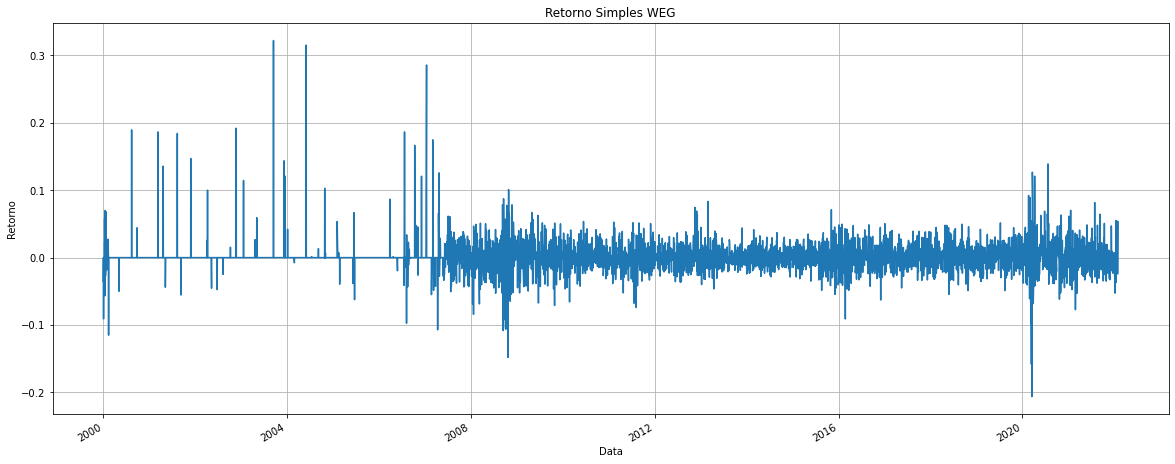

In [10]:
df_fechamento['simple_return'].plot(figsize=(20,8))
plt.title('Retorno Simples WEG')
plt.ylabel('Retorno')
plt.xlabel('Data')
plt.grid()
plt.show()

In [11]:
df_fechamento['log_return'] = (np.log(df_fechamento['Adj Close'] / df_fechamento['Adj Close'].shift(1)))

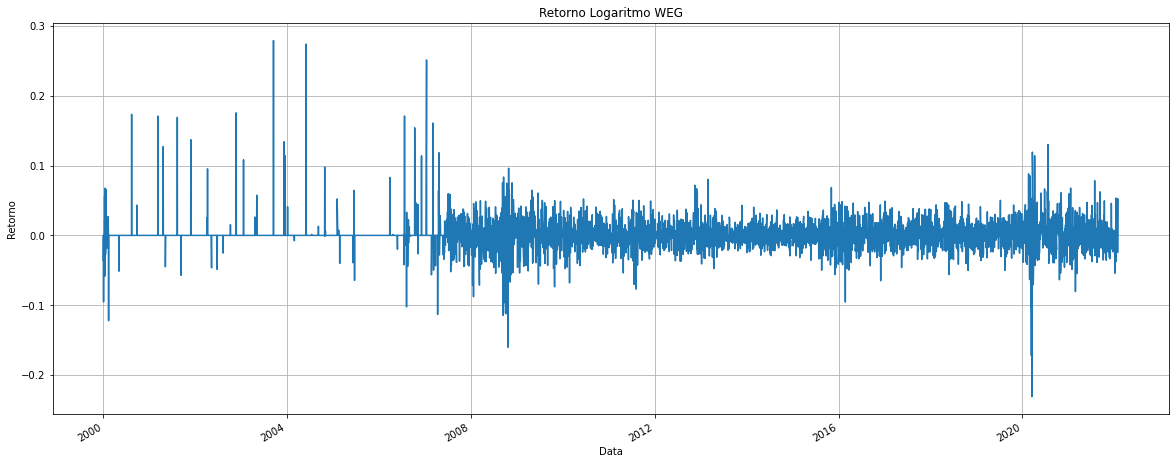

In [12]:
df_fechamento['log_return'].plot(figsize=(20,8))
plt.title('Retorno Logaritmo WEG')
plt.ylabel('Retorno')
plt.xlabel('Data')
plt.grid()
plt.show()

In [13]:
df_fechamento['simp_ret_cum'] = (df_fechamento['simple_return'] + 1).cumprod()-1

In [14]:
df_fechamento['log_ret_cum'] = df_fechamento['log_return'].cumsum()

In [15]:
df_fechamento.tail()

,Adj Close,simple_return,log_return,simp_ret_cum,log_ret_cum
Date,,,,,
2022-01-24,29.920000,-0.022542,-0.022800,236.367144,5.469608
2022-01-25,29.980000,0.002005,0.002003,236.843143,5.471611
2022-01-26,30.740000,0.025350,0.025034,242.872524,5.496646
2022-01-27,32.400002,0.054001,0.052594,256.041972,5.549239
2022-01-28,31.620001,-0.024074,-0.024369,249.853920,5.524871


## Risco

Há diversos tipo de definições de risco, em finança quantitativas uma maneira bem fácil de calcular o risco é a partir da variação do ativo. Basicamente, você não quer investir num ativo que varia muito, ou seja, muito imprevisível. Uma maneira estátistica de cálcular essa volatilidade é a partir do desvio padrão.

- 2.5) Calcule o desvio padrão do ativo

Apenas o valor do desvio padrão não apresenta muita informação, então iremos calcular o rolling std. Básicamente iremos calcular o desvio padrão a cada t intervalo de tempo.

- 2.6) Calcule o rolling std

Dica: utilize o método ```pandas.rolling(window).std()``` do pandas, window é o intervalo em que você irá calcular o desvio padrão

- 2.7) Calcule o desvio padrão exponencial móvel (EWMA)

## Desafio

- 2.8) Calcule o desvio padrão estimado pelo High e Low ([Parkinson Number](https://www.ivolatility.com/help/3.html))
<img src="https://miro.medium.com/proxy/0*t4hSod9UQhA3Lsmz.png">

- 2.9) Calcule o desvio padrão estimado por High, Low, Close e Open ([Garman-Klass](https://portfolioslab.com/garman-klass))

<img src="https://miro.medium.com/max/1400/0*S6HDttTDL2p0GCC2.png">

Temos uma breve explicação desses estimadores de volatilidade em nosso Turing Talks: [Construindo uma Estratégia de Investimentos Quantitativa — Time Series Momentum](https://medium.com/turing-talks/construindo-uma-estrat%C3%A9gia-de-investimentos-quantitativa-time-series-momentum-7e60a40636bd)

In [16]:
df_fechamento.std()

Adj Close         9.158908
simple_return     0.021200
log_return        0.020764
simp_ret_cum     72.665313
log_ret_cum       1.514448
dtype: float64

In [17]:
t = 30
df_fechamento.rolling(t).std()

,Adj Close,simple_return,log_return,simp_ret_cum,log_ret_cum
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-01-24,2.273922,0.021218,0.021218,18.039916,0.070519
2022-01-25,2.198437,0.021129,0.021134,17.441068,0.068370
2022-01-26,2.097470,0.021874,0.021875,16.640056,0.065391


In [18]:
df_std = df_fechamento[['simple_return', 'log_return']].rolling(t).std()

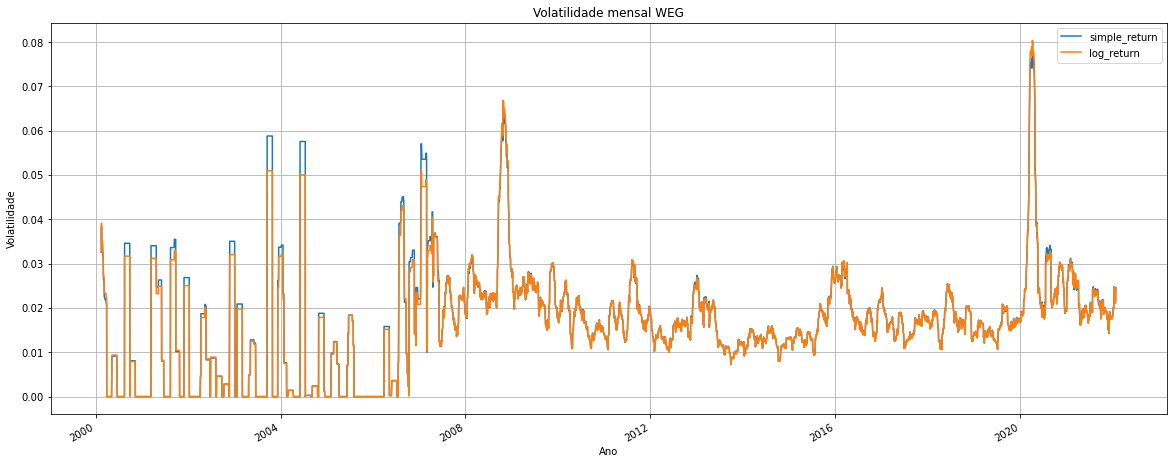

In [19]:
df_std.plot(figsize=(20,8))
plt.title('Volatilidade mensal WEG')
plt.ylabel('Volatilidade')
plt.xlabel('Ano')
plt.grid()
plt.show()

In [20]:
df_ewma = df_fechamento[['simple_return', 'log_return']].ewm(span=30).mean()

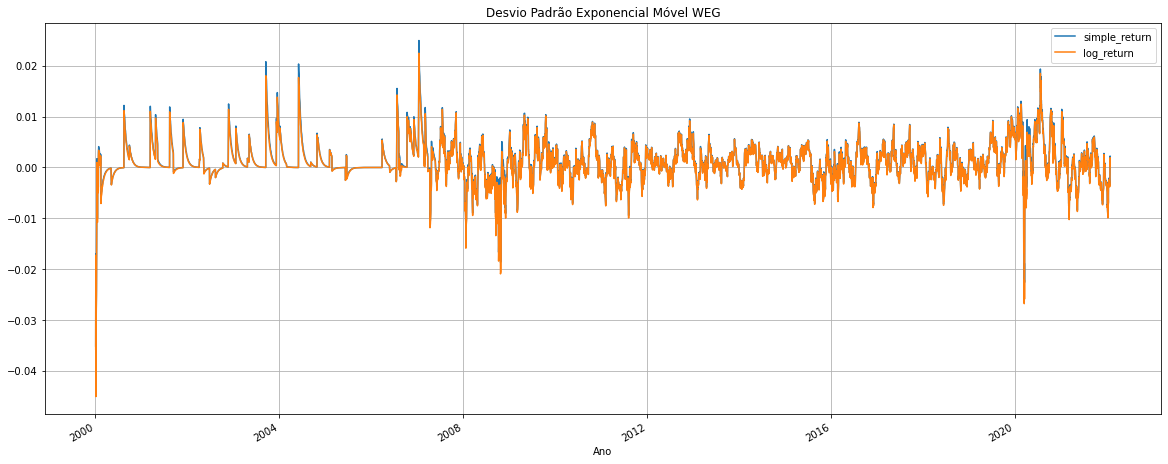

In [21]:
df_ewma.plot(figsize=(20,8))
plt.title('Desvio Padrão Exponencial Móvel WEG')
plt.xlabel('Ano')
plt.grid()
plt.show()

# 3. Lidando com portfolios
 
[Notebook de auxilio](https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Introduction_to_NumPy/notebook.ipynb)

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes. 
 - Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos **dados históricos de fechamento**.
 
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de [pesos de um portfolio](https://www.investopedia.com/terms/p/portfolio-weight.asp)
 - Atribua pesos ($w$) para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]

## Retorno

Agora, você pode calcular o **retorno** do seu portfolio. 

O retorno para um período é dado pela seguinte fórmula: $R = \vec{r} \times \vec{w}$

Onde $\vec{r}$ é o vetor de retornos de cada ativo da carteira, e $\vec{w}$ os seus respectivos pesos.

- 3.1) Calcule o **retorno** para cada dia da série temporal

- 3.2) Faça um gráfico para visualizar os **retornos cumulativos** do seu portfolio e compare com algum benchmark (EX: IBOV). 

In [22]:
df = pd.DataFrame(yf.download('WEGE3.SA ITSA4.SA EGIE3.SA ABEV3.SA', start='2010-01-01')['Adj Close'])

[*********************100%***********************]  4 of 4 completed


In [23]:
df.tail()

,ABEV3.SA,EGIE3.SA,ITSA4.SA,WEGE3.SA
Date,,,,
2022-01-24,14.72,39.340000,9.47,29.920000
2022-01-25,14.94,39.279999,9.68,29.980000
2022-01-26,15.00,39.310001,9.84,30.740000
2022-01-27,15.40,39.709999,9.97,32.400002
2022-01-28,14.93,40.139999,10.07,31.620001


In [24]:
w = [0.4, 0.2, 0.2, 0.2]
r = df.pct_change()

## Risco

Para calcular um **risco** de um portfolio precisamos levar em conta as correlações entre todos os ativos. Para isso calcularemos a matriz de covariaças $C$ (```pandas.cov()``` ou ```np.cov()```).

A equação do risco de uma portfólio é dada pela seguinte fórmula: $\sigma = \sqrt{\vec{w}C\vec{w}^\mathsf{T}}$, sendo $T$ a tranposição de um array 

- 3.3) Calcule o risco de 3 portfólios (varie o vetor de pesos).

In [25]:
ibov = pd.DataFrame(yf.download('^BVSP', start = '2010-01-01')['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [26]:
ibov.head()

,Adj Close
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0


In [27]:
R = np.dot(r, w)
R = R[np.logical_not(np.isnan(R))]
pd.DataFrame(R, columns = ['R'])

,R
0,0.002845
1,0.000718
2,0.005401
3,0.003357
4,-0.011254
...,...
2989,-0.004550
2990,0.010509
2991,0.010135
2992,0.026144


In [28]:
retorno_cumulativo_carteira = np.cumprod(R[1:] + 1)-1
retorno_cumulativo_ibov = np.cumprod(ibov.pct_change()+1)-1

print("Retorno acumulado da carteira no perído: ", retorno_cumulativo_carteira[-1]*100, "%")
print("Retorno acumulado do ibovespa no perído: ", retorno_cumulativo_ibov['Adj Close'][-1]*100, "%")

Retorno acumulado da carteira no perído:  506.13534941338054 %
Retorno acumulado do ibovespa no perído:  59.76886510457546 %


In [51]:
ibov

,Adj Close
Date,
2010-01-04,70045.000000
2010-01-05,70240.000000
2010-01-06,70729.000000
2010-01-07,70451.000000
2010-01-08,70263.000000
...,...
2022-01-24,107752.000000
2022-01-25,109845.000000
2022-01-26,111573.000000


In [29]:
# w é [0.4, 0.2, 0.2, 0.2]
w = np.array(w)
port = df
log_ret = np.log(port/port.shift(1))
vol = np.sqrt(np.dot(w.T, np.dot(log_ret.cov()*252, w)))
print("A volatilidade é de ",vol*100,"%")

A volatilidade é de  20.531036284608167 %


In [30]:
w = [0.25, 0.25, 0.25, 0.25]
w = np.array(w)
port = df
log_ret = np.log(port/port.shift(1))
vol = np.sqrt(np.dot(w.T, np.dot(log_ret.cov()*252, w)))
print("A volatilidade é de ",vol*100,"%")

A volatilidade é de  20.520443942753722 %


In [31]:
w = [0.50, 0.1, 0.1, 0.3]
w = np.array(w)
port = df
log_ret = np.log(port/port.shift(1))
vol = np.sqrt(np.dot(w.T, np.dot(log_ret.cov()*252, w)))
print("A volatilidade é de ",vol*100,"%")

A volatilidade é de  21.50318156930167 %


## Teoria Moderna de Portifolio - Markowitz 

Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. A maneira mais simples de encontrar a melhor solução é via simulação. Portanto simula-se diversos pesos, e para cada peso é calculado seu retorno esperado e risco. 

- 3.4) Otimize a carteira e obtenha o portfolio com o melhor retorno ajustado ao risco (Sharpe Ratio)

<img src="https://miro.medium.com/max/864/1*RQrjkJQhgVLnpyo1lXbizA.png">

In [32]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets


def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [33]:
wallets = generate_wallets(df)

In [34]:
# ABEV3.SA, EGIE3.SA, ITSA4.SA, WEGE3.SA
best_portfolio(wallets)

array([0.15603873, 0.35874558, 0.00386076, 0.48135494])

In [35]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]
    
    plt.figure(figsize=(12, 10))
    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.grid()
    plt.show()

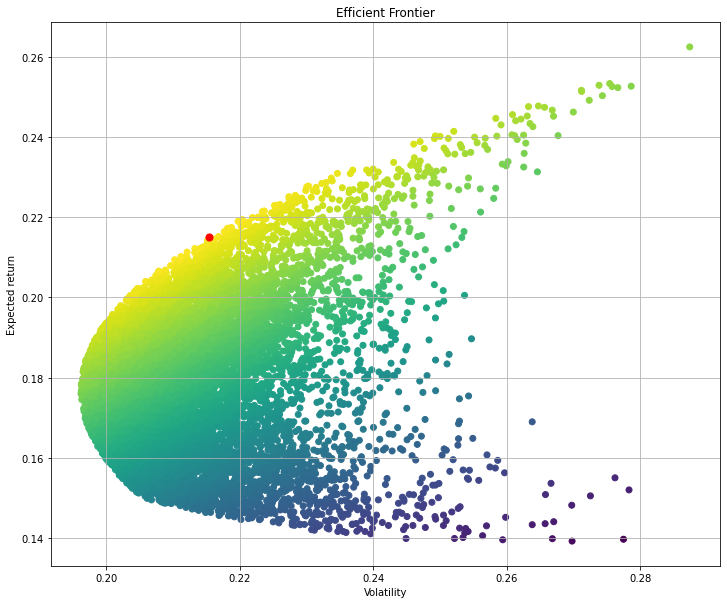

In [36]:
plot_efficient_frontier(wallets)

## Backtesting

Estratégia de investimento: Rebalanceamento mensal de uma carteira de investimentos.

- 3.5.1) Maneira simplificada: Calcular retornos mensais ao longo do tempo. Obtenha os pesos otimizado para o mês e calcule o rendimento do proxímo mês.
- 3.5.2) Maneira completa: Realize o rebalanceamento mensal e calcule os retornos diários. Fique atento que ao longo do mês os pesos do ativos variam.
- 3.6) Faça uma análise quantitativa e qualitativa da performace do backtesting.

In [37]:
!pip install bt --quiet

In [38]:
import bt

In [39]:
algos = [bt.algos.RunMonthly(),
         bt.algos.SelectHasData(),
         bt.algos.WeighMeanVar(),
         bt.algos.Rebalance()]

strategy = bt.Strategy(name='rebalance_strategy', algos=algos)

backtest = bt.Backtest(strategy = strategy,
                       data=df,
                       progress_bar=True)

rebalance_strategy = bt.run(backtest)['rebalance_strategy']

rebalance_strategy
0% [############################# ] 100% | ETA: 00:00:00

In [62]:
performance = rebalance_strategy.prices

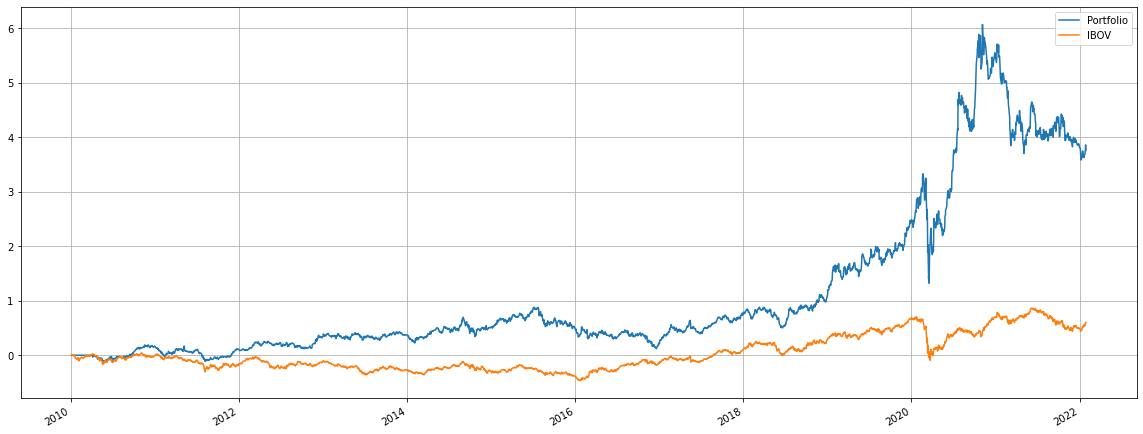

In [63]:
(((performance).pct_change()+1).cumprod() - 1).plot(figsize=(20,8))
plt.plot(((ibov.pct_change()+1).cumprod() - 1))
plt.legend(['Portfolio','IBOV'])
plt.grid()
plt.show()

# 4. Previsão de Time Series

## Cross validation em Séries Temporais

Sempre que lidamos com algoritmos de machine learning, para treiná-los temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação ao longo do tempo:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

## Feature Engineering em Série Temporal

Para inserir machine learning em séries temporais, precisamos efetuar o processo conhecido como feature engineering, que é básicamente construir as entradas de nosso modelo.

### Lags
Os dados mais simples que podemos inserir no nosso modelo são os valores passados.
Se deslocarmos (com a função `.shift(i)`) a série temporal em $i$ vezes, conseguimos estabelecer uma feature onde o valor atual no tempo $t$ é alinhado com um valor no tempo $t-i$. Chamamos isso de _lag_, ou atraso na série temporal. Isso é bastante útil, por exemplo, para estratégias baseadas em um valor histórico de uma feature.

### Demais features
Além dos pontos passados outras features podem ser inseridas no modelo: Volume de negociações, momentum, volatilidade, dados do mercado (ex: ibov) e etc.

- 4.1) Realize o feature engineering e teste alguns modelos de ML (Ex: Regressão linear, ARIMA, Decision Tree, Random Forest, Redes Neurais, etc...)
- 4.2) Faça um gráfico comparando os valores reais e preditos pelo modelo, durante um determinado período.
<br/>
Exemplo:
<br/>
<img width="500" height="500" src="https://miro.medium.com/max/1000/1*NvhZBDp5jNX-5Qd4LT7FEw.png">

In [65]:
df = pd.DataFrame(performance)

In [73]:
lag = 30

In [97]:
df['lag'] = df['rebalance_strategy'].shift(lag)
df.dropna(inplace=True)

In [98]:
x = np.array(df.drop('rebalance_strategy', axis=1))
y = np.array(df['rebalance_strategy'])

In [99]:
from sklearn import linear_model

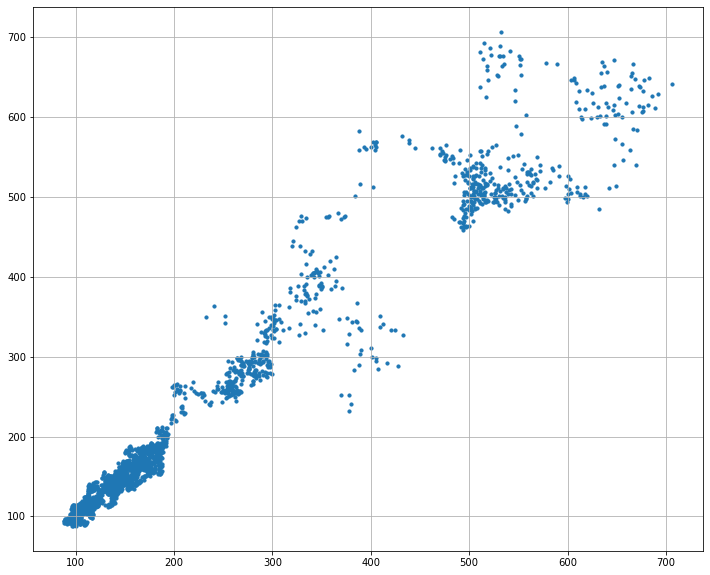

In [100]:
plt.figure(figsize=(12, 10))
plt.scatter(x, y, s=10)
plt.grid()
plt.show()

In [101]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

## LSTM

E por fim te desafiamos a implementar uma arquitetura de redes neurais para dados sequências: LSTM. Podem tomar como referência esse notebook, podem copiar o código, o intuito dessa etapa é que vocês tenham um contato com Deep Learning. (https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view?usp=sharing)

In [42]:
# Escreva seu código aqui